<h2> DATA 319: Model-based and Data-based Methods for Data Analytics. Summer 2024 </h2>
<h3> Problem Set 6 </h3>
<h3> Team <i> (Insert your team number here) </i></h3>
<h3> Type students' names <i> (only those who contributed to the group work)</i> here</h3>

#### 1. Your goal is to perform an unsupervised clustering analysis on US crime data by states. This problem references the `US_State_Crime.csv` which includes features for various crimes both in frequencies and rates for 50 U.S. States.

##### (a) Load in the crime data and perform an exploratory analysis of the columns. Since your goal is to cluster the states by their crime properties a first natural step would be to identify and select the relevant numerical columns to use. Make some visualizations and report the summary statistics of the columns. Select a subset of the columns to use in your clustering analysis below and justify your decisions.

Because we are interested in clustering states by their crime properties I chose to examine the rates of all of the crimes in each state, ignoring the total number, and the rates for each category of crime such as violent crime or property crime. I thought that these rates would better account for the population differences of each state and because they were already included in the dataset I wouldn't have to account for population differences myself using the population data from the set. I chose to examine each column with a box plot and they all appear pretty standard, with no outliers.

Please See Code and Visualizations below

##### (b) Create a correlation matrix and a variance/covariance matrix for your chosen numerical columns. What do you observe from these matrices?

The Correlation heatmap is very interesting, the relationships between different crime rates vary quite a bit. There are some such as murder and burglary that have strong positive correlations and some that have no correlation at all such as rape and motor vehicle theft. The covariance is a bit strange looking as a heat map mostly because the scale of the gradient bar is a bit skewed but there are some clear areas of high covariance.

##### (c) Use agglomerative hierarchical clustering to make a dendrogram for your chosen columns. Defend any choices you make while implementing the clustering method.
I chose to standardize the data before feeding it into the clustering to create the dendrogram, this makes it so that the weights of the features are all similar and contribute evenly to the distance calculation. It also improves the clustering quality.

##### (d) Determine an appropriate number of clusters from your dendrogram and make some visualizations with the points (representing states) colored by cluster.

Based on the dendrogram the number of clusters should be around 2 to 3.

 see below for the visualization

##### (e) Repeat the computations in (c) and (d) with a non-agglomerative method (pick your favorite but justify why it is a reasonable choice for this data).

I chose K-Means clustering because it is simpler and doesn't require specifying a number of clusters in a advance. It also gives a different perspective on the data showing different non overlapping clusters instead of a hierarchy of clusters. It still is compatible with this data set as well.

##### (f) Summarize your findings from (a-e) in a couple of paragraphs.

For this analysis I chose to isolate the rates that crimes were being committed at in each state. I chose to look at those stats specifically because they don't get skewed by the different states having different populations and while the populations were provided I felt that it would be easier to look at the rates of the crimes instead of total number. The initial exploration of the data suggested that clustering would yield useable results.

The dendrogram was difficult to pin down, there were two very long vertical lines stemming from the origin which suggested that the optimal number of clusters for the data set was 3. After running the clustering and plotting it as a chart, the coloring of the points for 2 of the clusters seem to make sense, however the third one is quite spread out.

The Results were a bit different from the k-means clustering that was run for comparison, the k-means decided to generate 5 different clusters with centroids in different locations than where it seems they would be in the 3 cluster agglomerate method. The clusters themselves appeared to contain different points although that could be accounted for when considering the difference in number of clusters points were fit into. Overall, there does seem to be categories of crime rates that states fall into, this suggests that further analysis could be beneficial and insightful.

In [ ]:
#setup
%pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
#A 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Import Data
crime_data = pd.read_csv('US_State_Crime.csv')

#rename index column
crime_data.rename(columns={'Unnamed: 0':'Index'}, inplace=True)

#drop non-numeric columns
crime_data = crime_data.select_dtypes(include=['int64','float64'])

#select subset of columns
crime_data = crime_data[['MurderRate', 'RapeRate', 'RobberyRate', 'AssaultRate', 'BurglaryRate', 'LarcenyTheftRate', 'MotorVehicleTheftRate']]
crime_data.describe()

#boxplot of columns
for column in crime_data.columns:
        plt.figure(figsize = (10, 6))
        sns.boxplot(x = crime_data[column])
        plt.title(f'boxplot of {column}')
        plt.show

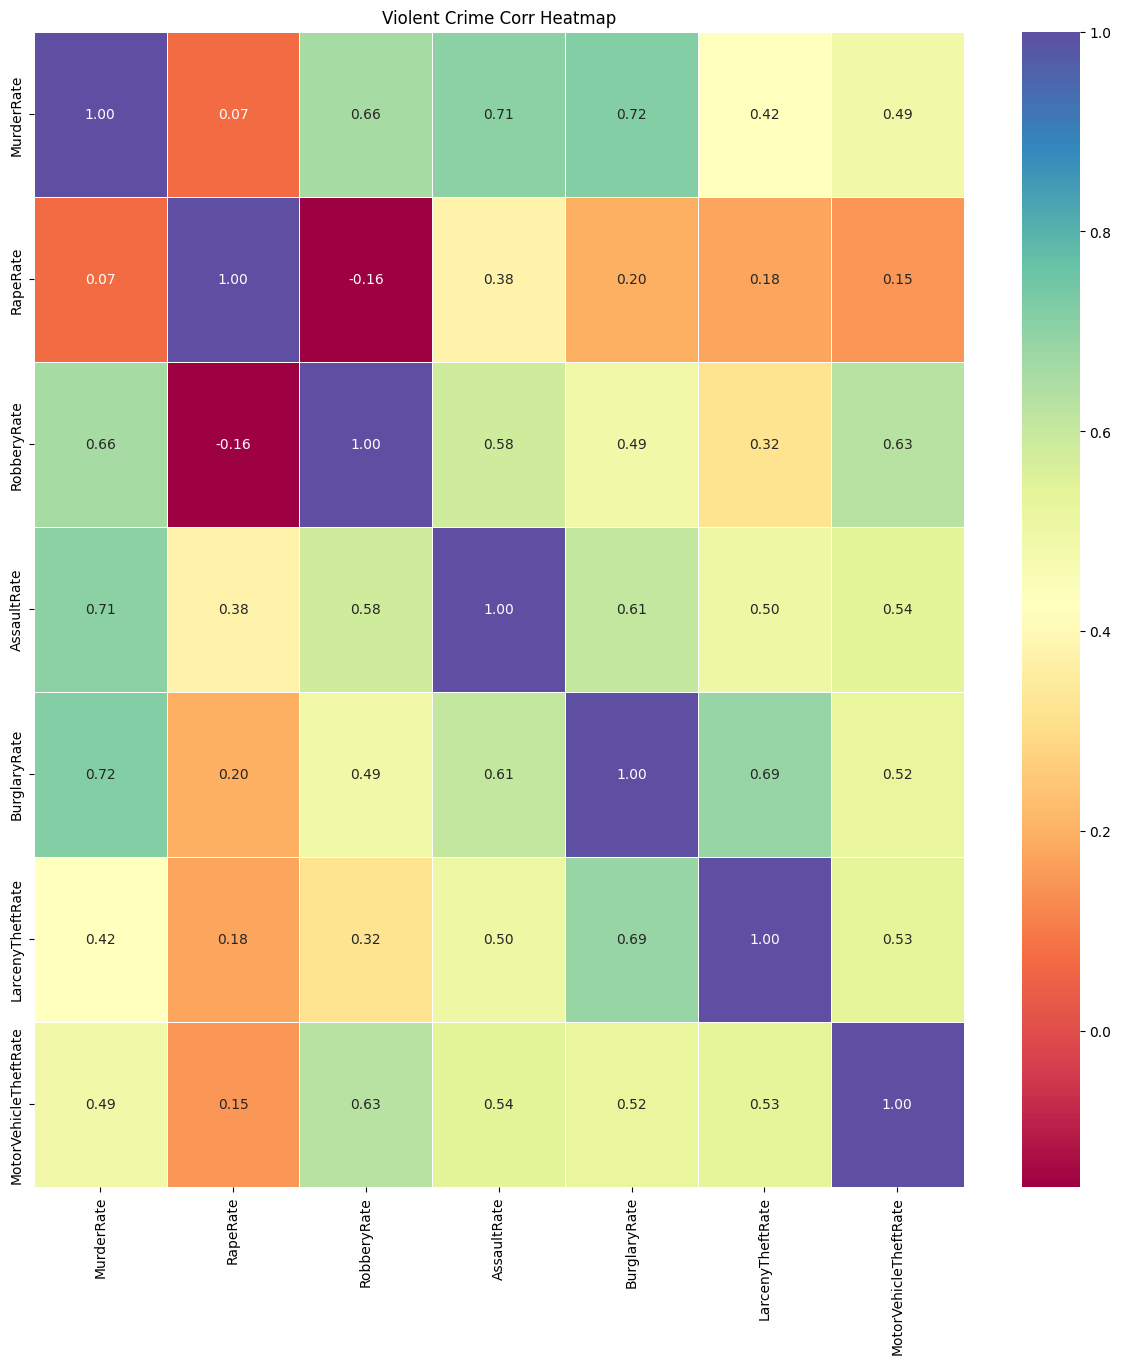

                       MurderRate    RapeRate  RobberyRate   AssaultRate  \
MurderRate               5.151657    1.726351    80.146376    186.340841   
RapeRate                 1.726351  112.788800   -88.949747    468.629616   
RobberyRate             80.146376  -88.949747  2889.612343   3653.668008   
AssaultRate            186.340841  468.629616  3653.668008  13532.675841   
BurglaryRate           406.876922  520.274065  6557.578947  17648.461208   
LarcenyTheftRate       355.938310  699.353208  6355.285600  21510.947392   
MotorVehicleTheftRate  103.121592  145.587102  3150.127878   5873.259143   

                       BurglaryRate  LarcenyTheftRate  MotorVehicleTheftRate  
MurderRate               406.876922        355.938310             103.121592  
RapeRate                 520.274065        699.353208             145.587102  
RobberyRate             6557.578947       6355.285600            3150.127878  
AssaultRate            17648.461208      21510.947392            5873.25914

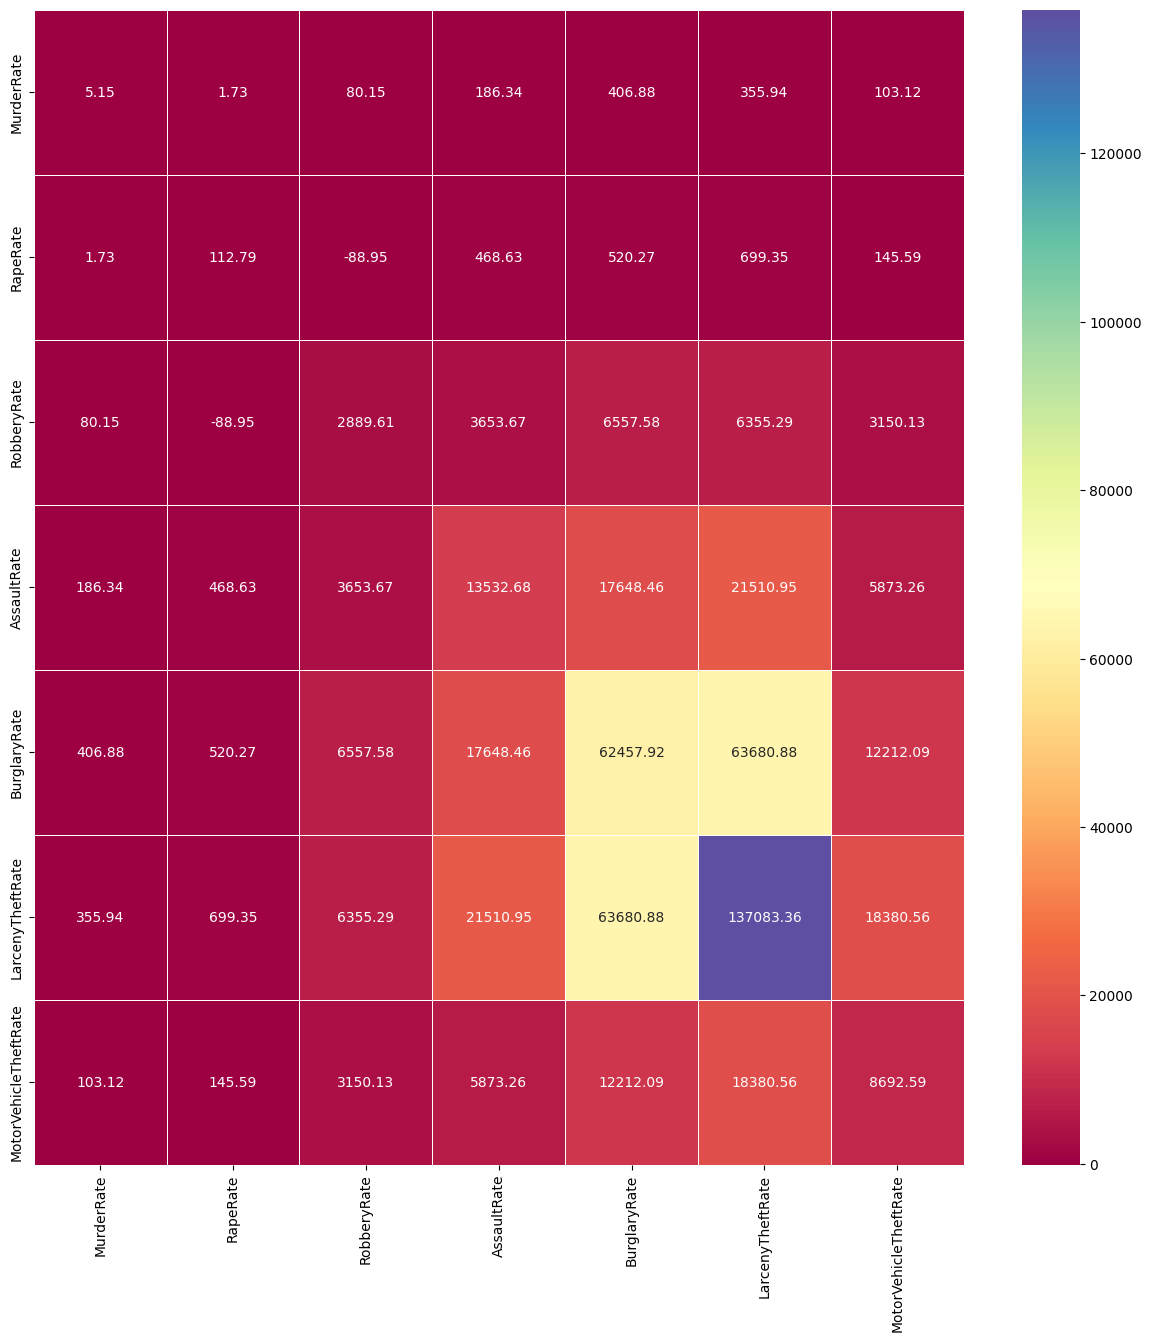

In [16]:
#B
#Corr matrix

corr_matrix = crime_data.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'Spectral', linewidths = .5)
plt.title('Violent Crime Corr Heatmap')
plt.show()

#Cov Matrix
cov_matrix = crime_data.cov()
plt.figure(figsize = (15, 15))
sns.heatmap(cov_matrix, annot = True, fmt = '.2f', cmap = 'Spectral', linewidths = .5)
print(cov_matrix)

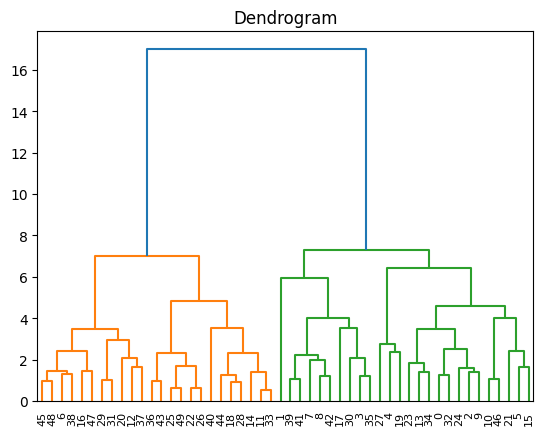

In [11]:
#C
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

#standardize
StandardScaler = StandardScaler()
crime_data_standardized = StandardScaler.fit_transform(crime_data)

#dendrogram
linkage_matrix = linkage(crime_data_standardized, 'ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram')

#agglomerative Clustering
AggClustering = AgglomerativeClustering(n_clusters = 3)
clusters = AggClustering.fit_predict(crime_data_standardized)

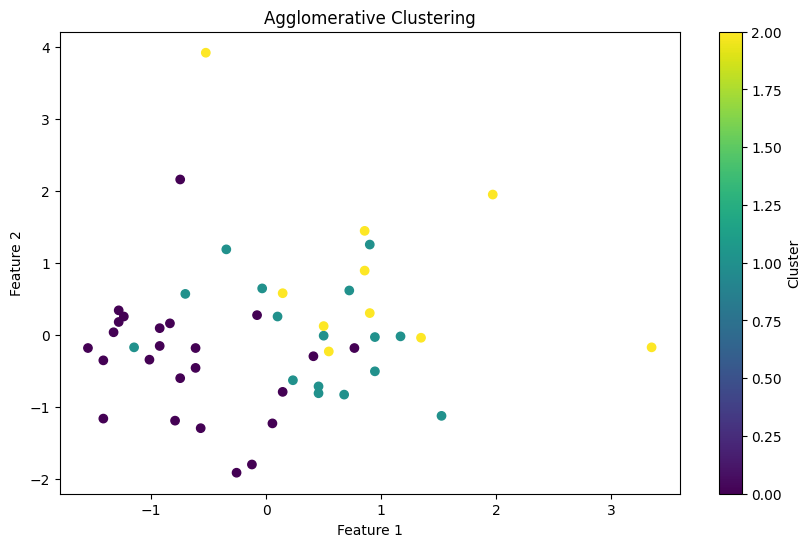

In [12]:

#plots
plt.figure(figsize = (10, 6))
plt.scatter(crime_data_standardized[:, 0], crime_data_standardized[:, 1], c = clusters, cmap = 'viridis', label = 'States')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label = 'Cluster')
plt.show()

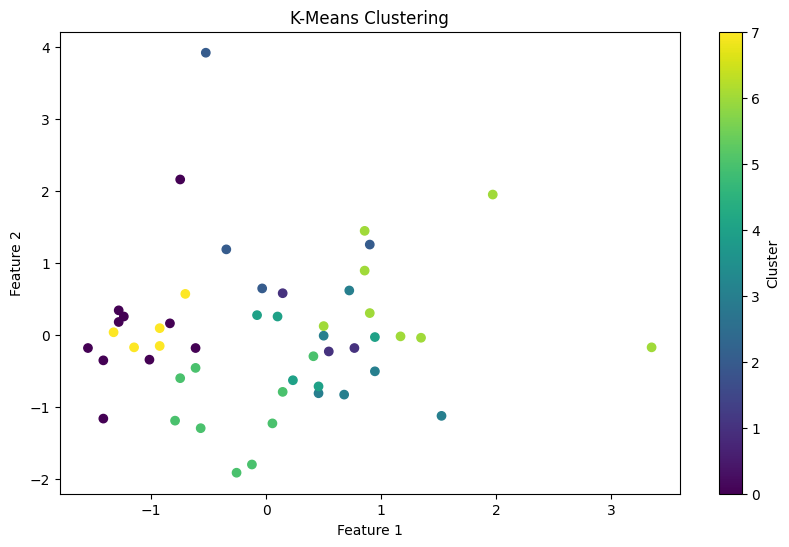

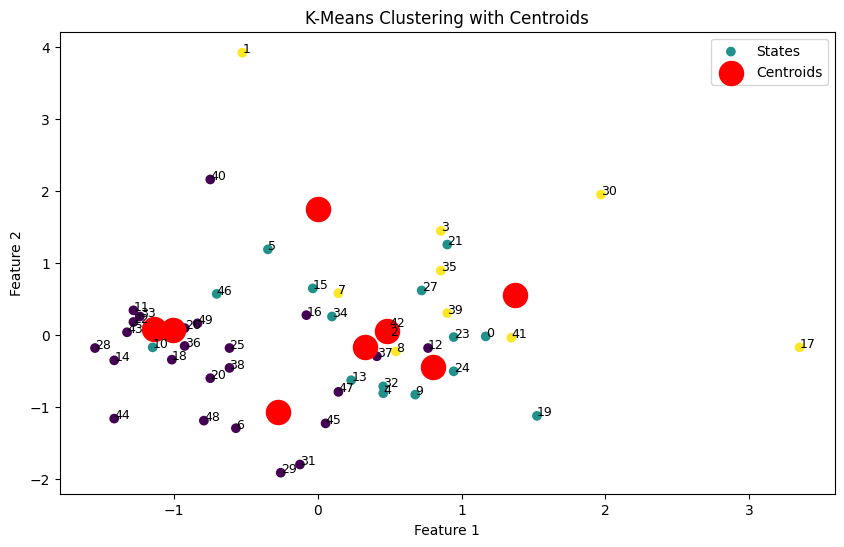

In [14]:
#E

#K-Means
kmeans = KMeans()
kmeans.fit(crime_data_standardized)
kmeans_clusters = kmeans.predict(crime_data_standardized)

plt.figure(figsize=(10, 6))
plt.scatter(crime_data_standardized[:, 0], crime_data_standardized[:, 1], c = kmeans_clusters, cmap='viridis', label='States')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(crime_data_standardized[:, 0], crime_data_standardized[:, 1], c=clusters, cmap='viridis', label='States')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='o')
state_names = crime_data.index
for i, txt in enumerate(state_names):
    plt.text(crime_data_standardized[i, 0], crime_data_standardized[i, 1], txt, fontsize=9)
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

#### 2. This problem, motivated by a similar problem in Stanford CS246 course, asks you to implement an iterative version of the $k$-means algorithm and compare the performance of two different distance functions and two intialization strategies. Recall that $k$-means alternates between two steps:

##### &emsp; I Given a set of $k$ center points $C_i$ for the clusters, assign each datapoint to the ‘closest’ center

##### &emsp; II Update the center point for each cluster as the mean of all the data points assigned to that cluster

#### We then repeat these steps until either a convergence criterion is reached (usually that the sum of the distances for each point to its corresponding cluster center has converged to within some tolerance) or until a fixed number of iterations is completed.

##### (a) Write a python program that takes as input a dataset, a value for $k$, a set of starting centroids, and a maximum number of iterations and outputs the results of running the $k$-means algorithm, starting with those initial cluster points, for that number of steps. For each iteration of the algorithm you should also compute the current cost, defined as the sum over all points of the distance between that point and its cluster.

##### (b) Load in the input data from `text_data.txt` and the two sets of starting centers `centers_1.txt` and `centers_2.txt`. The rows of the data represent documents and the columns represent the relative importance of a collection of words. The first centers were chosen randomly and the second centers were chosen to be as far apart as possible.

##### (c) Run your algorithm on the text data from both sets of centers. For the cost computation, use the Euclidean distance between the data point and its center.

##### (d) Make a plot showing the cost as a function of iterations for both experiments and comment on your observations. Based on this experiment is a random choice of starting points or a maximally distant choice a better option? Justify your answer.

##### (e) Now rerun the experiment with both starting sets using the Manhattan metric instead of the Euclidean to define the distance between points and centers. 

##### (f) Make a plot showing the cost as a function of iterations for both experiments and comment on your observations. Based on this experiment is a random choice of starting points or a maximally distant choice a better option? Justify your answer. 

##### (g) What differences do you notice between the Euclidean and Manhattan approaches?